In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
from PIL import Image
import os
import pandas as pd
import pylab as pl
from sklearn.decomposition import IncrementalPCA

In [9]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [10]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [11]:
X = pd.DataFrame([im.histogram() for im in images])

In [12]:
pca = IncrementalPCA()
pca.fit(X)
X = pca.transform(X)

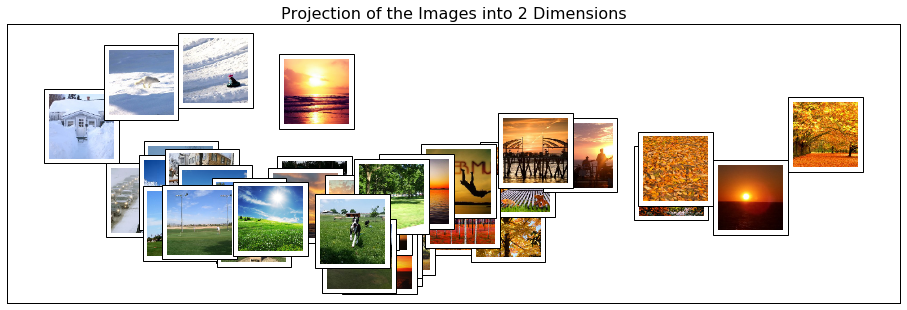

In [13]:
plot_image_space(images,  X)

'\n1.) The darker ones trend more towards the top, it seems like Samsung Galaxys are typically higher than iPhones\n        \n2.) It seems like the farther right and lower are iPhones where the higher are Samsung Galaxyies.\n\n'

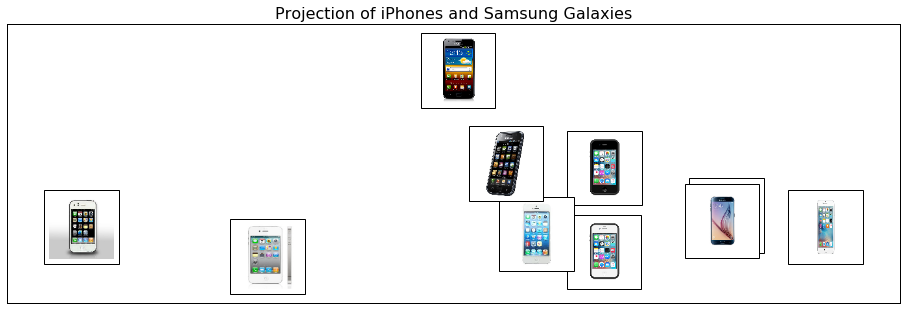

In [19]:
"""
Part 2


1.) It seems for two images to be close to each other, they have to have similiar RGB values (lighter colors to the left, 
        darker colors to the right.) The top left is white photos where the bottom right is dark. If they are far apart, then 
        they should be different RGB values.
        
2.) Ones that are similiar seasons due tend to stick together. The reason may be because all the images of winter contain snow 
    and that makes the photo have a high RGB value, where the Fall and Summer photos are more orange for the sun. This wouldn't
    apply to all photos, just these set. For example, it barely snows in Seattle during winter, it usually just is a dreary
    with rain. So, images of Seattle Winter would be closer to the right side.

"""

"""
Part 3

"""
img_dir_cellphone = os.path.join(os.getcwd(), "cellimages") # directory path
phone_images = load_images(img_dir_cellphone) # load images in the specified directory
Y = pd.DataFrame([im.histogram() for im in phone_images])
pca_cell = IncrementalPCA()
pca_cell.fit(Y)
Y = pca_cell.transform(Y)

plot_image_space(phone_images,  Y, title="Projection of iPhones and Samsung Galaxies")

"""
1.) The darker ones trend more towards the top, it seems like Samsung Galaxys are typically higher than iPhones
        
2.) It seems like the farther right and lower are iPhones where the higher are Samsung Galaxyies.

"""